In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1

Demonstrate the ability to fetch, process and leverage data to generate useful predictions
by training Supervised Learning algorithms.

Steps and tasks: [ Total score: 30 points ]

### 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [2]:
# Importing files

data1 = pd.read_csv ('Part1 - Normal.csv')
data2 = pd.read_csv ('Part1 - Type_H.csv')
data3 = pd.read_csv ('Part1 - Type_S.csv')

In [3]:
# Check shape and size

data1.shape, data2.shape, data3.shape

((100, 7), (60, 7), (150, 7))

In [4]:
data1.size, data2.size, data3.size

(700, 420, 1050)

In [5]:
# Check if the columns are same so that we can merge the data

data1.head(2), data2.head(2), data3.head(2)

(   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
 0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
 1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal,
    P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
 0    63.027818  22.552586  39.609117  40.475232   98.672917 -0.254400  Type_H
 1    39.056951  10.060991  25.015378  28.995960  114.405425  4.564259  Type_H,
    P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
 0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
 1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S)

In [6]:
# Columns are same, so by using concat function merge the data

data = pd.concat([data1, data2, data3], axis=0)
data.shape, data.size

((310, 7), 2170)

In [7]:
data.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


### 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [8]:
# Check data type

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [9]:
# All the other data types are correct except Class. We will convert it to Category.

data['Class'] = data['Class'].astype('category')
data.dtypes

P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object

In [10]:
# Check null values and special characters

data.isnull().sum().sum()

0

In [11]:
(data == '?').sum().sum()

0

In [12]:
# Check unique values in Class. And merge typo difference.

data.Class.unique()

['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']
Categories (6, object): ['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']

In [13]:
data.Class.replace('Nrmal', 'Normal', inplace= True)
data.Class.replace('type_h', 'Type_H', inplace= True)
data.Class.replace('type_s', 'Type_S', inplace= True)
data.Class.replace('tp_s', 'Type_S', inplace= True)

In [14]:
data.Class.unique()

# We have 3 unique class

['Normal', 'Type_H', 'Type_S']
Categories (3, object): ['Normal', 'Type_H', 'Type_S']

### 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

In [15]:
data.describe(include='all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


From above chart we can say there are outliers for almost all the variables.

Difference is more in S_Degree, mean is 26, 75% quartile is 41 but max value is 418.

In [16]:
# Check number of data for each class

data.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


We have more data for Type_S and less data for Type_H.

If needed we can perform data regularization techniques like SMOTE.

#### Univariate Analysis

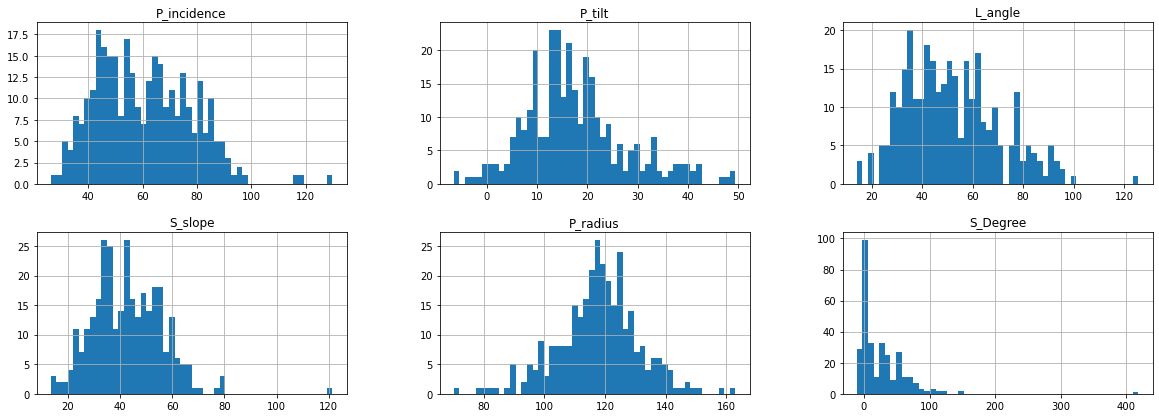

In [17]:
columns = list(data)[0:-1]

data[columns].hist(stacked= False, bins = 50, figsize = (20,30), layout = (8,3));

We can see the distributons for above histograms. 

S_Degree max observations are around 0. 

P_radius is normally distributed.

Other variables are also normally distributed with some outliers.

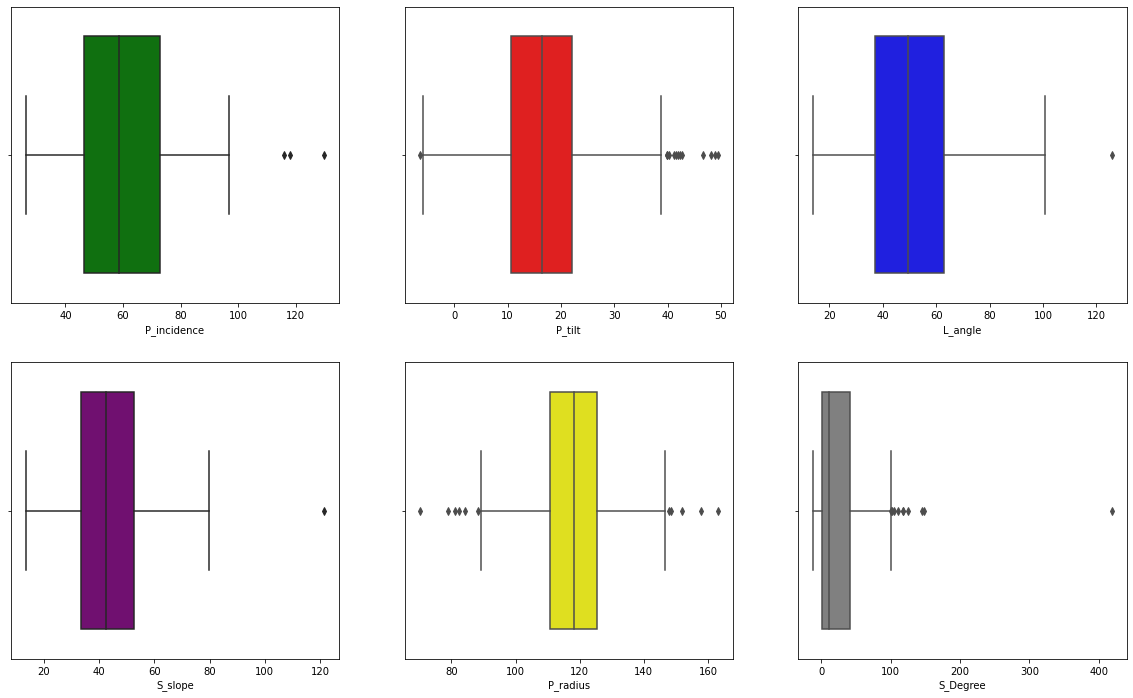

In [18]:
plt.figure(figsize=(20,12))
plt.subplot(2, 3, 1)
sns.boxplot(data = data, x='P_incidence', color='green');

plt.subplot(2, 3, 2)
sns.boxplot(data = data, x='P_tilt', color='red');

plt.subplot(2, 3, 3)
sns.boxplot(data = data, x='L_angle', color='blue');

plt.subplot(2, 3, 4)
sns.boxplot(data = data, x='S_slope', color='purple');

plt.subplot(2, 3, 5)
sns.boxplot(data = data, x='P_radius', color='yellow');

plt.subplot(2, 3, 6)
sns.boxplot(data = data, x='S_Degree', color='gray');



We can see there are extreame outliers present in P_incidence, L_angle, S_slope and S_Degree. But as we are going to use KNN, we dont need to remove outliers. 

**KNN works well with outliers.**

#### Bivariate Analysis

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


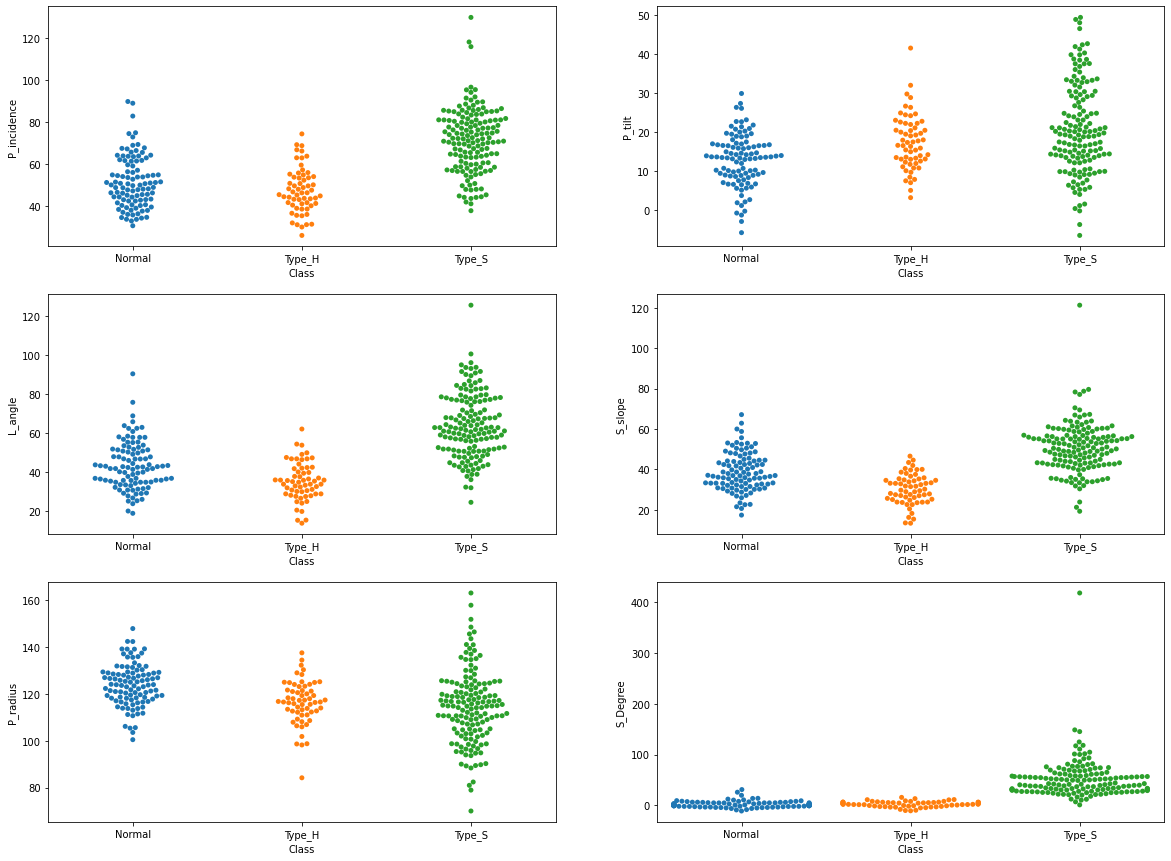

In [19]:
plt.figure(figsize=(20,15))
plt.subplot(3, 2, 1)
sns.swarmplot(data = data, x='Class', y = 'P_incidence');

plt.subplot(3, 2, 2)
sns.swarmplot(data = data, x='Class', y = 'P_tilt');

plt.subplot(3, 2, 3)
sns.swarmplot(data = data, x='Class', y = 'L_angle');

plt.subplot(3, 2, 4)
sns.swarmplot(data = data, x='Class', y = 'S_slope');

plt.subplot(3, 2, 5)
sns.swarmplot(data = data, x='Class', y = 'P_radius');

plt.subplot(3, 2, 6)
sns.swarmplot(data = data, x='Class', y = 'S_Degree');

From above chart we can say that Type_S has values which are distrubuted widely than the other Class. Even Type_S has higher values than the Normal and Type_H.

Type_H values are mostly lesser than Normal. And Normal values are in between Type_S and Type_H.

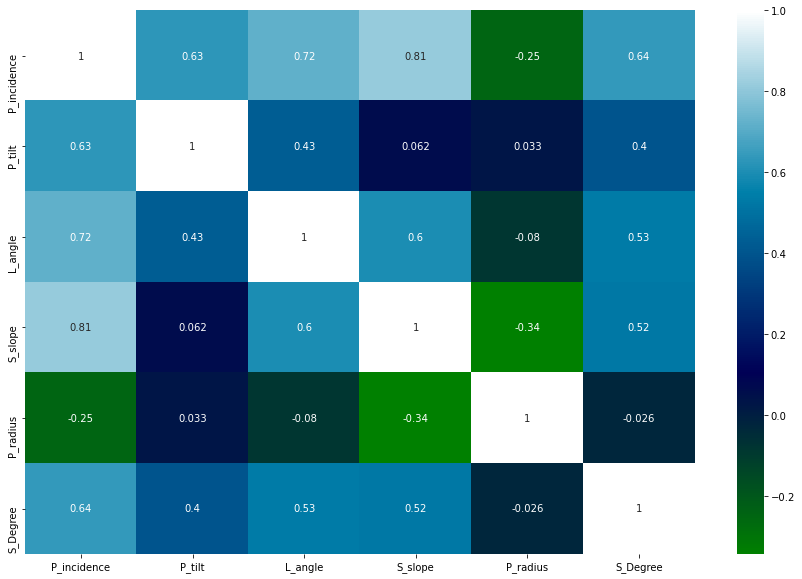

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = 'ocean');

There is no significant negative corelation between any variable.

There is a significant corelation between P_incidence, S_slope and L_angle.

Below variables are almost independent of each other:
1. P_incidence and P_radius
2. P_tilt and P_radius
3. P_tilt and P_slope
4. P_radius and L_angle
5. P_radius and S_Degree


#### Multivariate Analysis

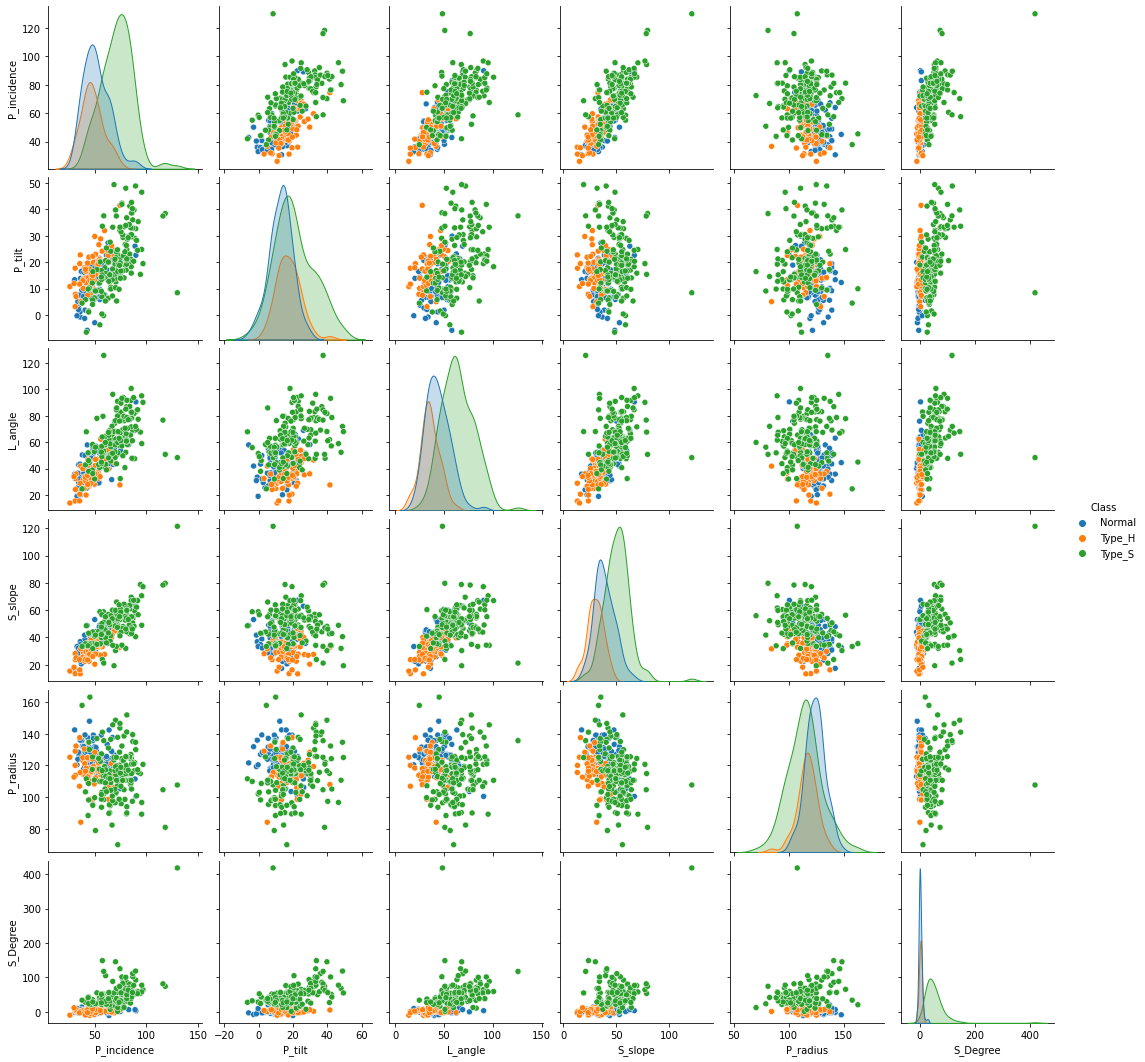

In [21]:
sns.pairplot(data = data, diag_kind = 'kde', hue='Class');

From above pairplot we can see that there is a linear relation between P_incidence, S_slope and L_angle.

Also, if we see distribution of class, Normal is most of the times between Type_H and Type_S. In most of the graphs Type_S is towards higher side and Type_H is at lower side.

We can see all the three classes are segregated to some extend, so the data quality is good. We will be able to predict the patient belongs to which class.

### 4. Data pre-processing:
• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.

In [22]:
y = data.pop('Class') 
x = data 

KNN requires standardization of the data. So we will standardize it

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

x_std = pd.DataFrame (StandardScaler().fit_transform(x))
x_std.columns = x.columns

x_std.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,-0.647896
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,-0.568091
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.725568
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-0.791650


In [24]:
y.value_counts(normalize = True).to_frame()

,Class
Type_S,0.483871
Normal,0.322581
Type_H,0.193548


We have very less data for Type_H (19%) and more data for Type_S (48%). We have 32% data for Normal.

If we would have got equal data for all classes it would have been better predictor.

In [25]:
# Split data into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state = 22)

In [26]:
# Target balancing using SMOTE technique

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state= 15)

# Using SMOTE on train data (we do not use SMOTE on testing data)
x_trainR, y_trainR = sm.fit_sample(x_train, y_train)

In [27]:
y_trainR.value_counts().to_frame()

,Class
Type_S,101
Type_H,101
Normal,101


### 5. Model training, testing and tuning:

• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# For KNN 3

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_trainR, y_trainR)
y_pred = knn.predict(x_test)

print (accuracy_score (y_test, y_pred))

# For KNN 5

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_trainR, y_trainR)
y_pred = knn.predict(x_test)

print (accuracy_score (y_test, y_pred))

# For KNN 9

knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_trainR, y_trainR)
y_pred = knn.predict(x_test)

print (accuracy_score (y_test, y_pred))

0.9032258064516129
0.8817204301075269
0.8279569892473119


From above accuracy scores we can say as KNN value for 3 is good but decreased for 5 and 9.

In [29]:
# Classification Report for KNN 3 for target balanced data

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_trainR, y_trainR)
y_pred = knn.predict(x_test)

print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.90      0.87      0.88        30
      Type_H       0.69      0.79      0.73        14
      Type_S       0.98      0.96      0.97        49

    accuracy                           0.90        93
   macro avg       0.85      0.87      0.86        93
weighted avg       0.91      0.90      0.91        93



**We are getting accuracy of 90% in testing data**

All the score are good i.e. precision, recall and f1 score.

For Type_H data we have less scores because data provided was less. Still the score is improved because of regularization.

In [30]:
# Classification Report for KNN 3 without target balanced data

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.80      0.80      0.80        30
      Type_H       0.57      0.57      0.57        14
      Type_S       0.96      0.96      0.96        49

    accuracy                           0.85        93
   macro avg       0.78      0.78      0.78        93
weighted avg       0.85      0.85      0.85        93



If we compare both the above reports with target balancing and without target balancing we can see the difference clearly.

The score for Type_H has increased significantly due to increase in data. Also, score is improved for Normal to some extend.

More the data more the percentage of accuracy we have.

In [31]:
# Let's find out best value for KNN automatically

# We will check for KNN values from 1 to 20 (odd numbers) and find optimal number using the Mis classification error
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# for accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1 to 25
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_trainR, y_trainR)
    # predict the response
    y_pred = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


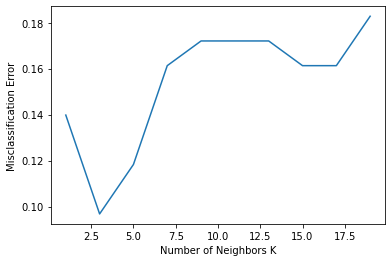

In [32]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

From above chart we can clearly see that at k-value of 3, misclassification error is less and its again increasing after k-value of 3.

Usually data underfits for small k-value and overfits for large k-value. And as per above plot 3 is optimal k-value.

### 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future

**Answer**

We can classify 90% accurately that which patient belongs to which class from provided details.

We can use k-value as 3 which gives 90% of accuracy score. 

There were no null values with some outliers. Quality of data is good as we could also distinguish from charts.

But data quantity was distribution was unequal. After using target balancing technique we could find out the good accuracy. If data could have been provided equally for all classes, it would have given better results or it would have been more reliable.

Clear description on each variables may have helped to understand problem statement better because of medical domain.

We can use KNN model because of good accuracy score, also the recall and precision values are good.

# Part 2

Build an AIML model to perform focused marketing by predicting the potential customers who will
convert using the historical dataset.

Steps and tasks: [ Total Score: 30 points ]

### 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [33]:
# Import datasets

df1 = pd.read_csv('Part2 - Data1.csv')
df2 = pd.read_csv('Part2 -Data2.csv')

In [34]:
# Check shape of datasets

df1.shape, df2.shape

((5000, 8), (5000, 7))

In [35]:
# Merge both data

df = pd.concat([df1, df2], axis = 1)
df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,2,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,3,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,4,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,5,0,0,0,0,1,NaN


In [36]:
# Check Shape & Size after merging

df.shape, df.size

((5000, 15), 75000)

### 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   ID                   5000 non-null   int64  
 9   Mortgage             5000 non-null   int64  
 10  Security             5000 non-null   int64  
 11  FixedDepositAccount  5000 non-null   int64  
 12  InternetBanking      5000 non-null   int64  
 13  CreditCard           5000 non-null   int64  
 14  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(13)
memory usage:

In [38]:
# Converting few columns which contain only 0 and 1 or a few values to Category datatype.

cols = ['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

for i in cols:
    df[i]= df[i].astype('category')

df.dtypes

ID                        int64
Age                       int64
CustomerSince             int64
HighestSpend              int64
ZipCode                   int64
HiddenScore            category
MonthlyAverageSpend     float64
Level                  category
ID                        int64
Mortgage                  int64
Security               category
FixedDepositAccount    category
InternetBanking        category
CreditCard             category
LoanOnCard             category
dtype: object

In [39]:
# We do not need column of ID, let's drop that.

df.drop('ID', axis= 1, inplace= True)
df.shape

(5000, 13)

In [40]:
df.isnull().sum().sum()

20

In [41]:
# 20 count is very less compared to data size, so dropping NA values

df.dropna(axis= 0, inplace = True)

df.isnull().sum().sum()

0

## 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis. 

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4980.0,45.352610,11.464212,23.0,35.0,45.0,55.000,67.0
CustomerSince,4980.0,20.117671,11.468716,-3.0,10.0,20.0,30.000,43.0
HighestSpend,4980.0,73.852410,46.070090,8.0,39.0,64.0,98.000,224.0
ZipCode,4980.0,93152.420482,2123.660073,9307.0,91911.0,93407.0,94608.000,96651.0
MonthlyAverageSpend,4980.0,1.939536,1.750006,0.0,0.7,1.5,2.525,10.0
Mortgage,4980.0,56.589759,101.836758,0.0,0.0,0.0,101.000,635.0


Below observations from above chart:

1. Values for CustomerSince is in negative as well.
2. There might be a skewness in data for HighestSpend, MonthlyAverageSpend and Mortgage as there is a huge difference between mean and max value.

The overall data looks good.

#### Univariate Analysis

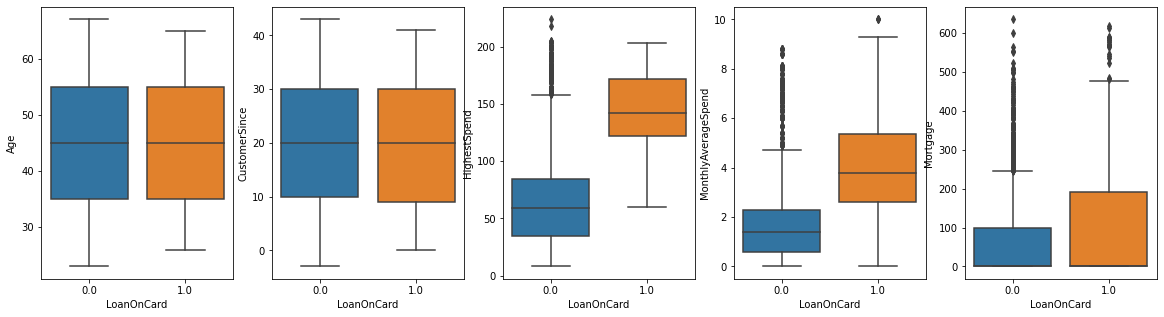

In [43]:
plt.figure(figsize = (20,5))

plt.subplot(1, 5, 1)
sns.boxplot(data= df, x= 'LoanOnCard', y= 'Age');

plt.subplot(1, 5, 2)
sns.boxplot(data= df, x= 'LoanOnCard', y= 'CustomerSince');

plt.subplot(1, 5, 3)
sns.boxplot(data= df, x= 'LoanOnCard', y= 'HighestSpend');

plt.subplot(1, 5, 4)
sns.boxplot(data= df, x= 'LoanOnCard', y= 'MonthlyAverageSpend');

plt.subplot(1, 5, 5)
sns.boxplot(data= df, x= 'LoanOnCard', y= 'Mortgage');


From above chart we can say that Age, CustomerSince does not have any effect on LoanOnCard.

More value of HighestSpend, MonthlyAverageSpend has more LoanOnCard.

More Mortgage more the chances of LoanOnCard. So we can focus on customers who already have Mortgage for loan.

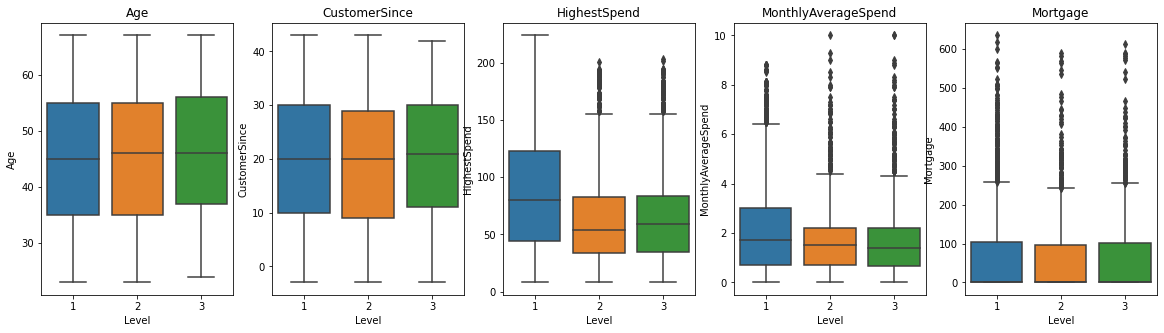

In [44]:
plt.figure(figsize = (20,5))

plt.subplot(1, 5, 1)
plt.title('Age')
sns.boxplot(data= df, x= 'Level', y= 'Age');

plt.subplot(1, 5, 2)
plt.title('CustomerSince')
sns.boxplot(data= df, x= 'Level', y= 'CustomerSince');

plt.subplot(1, 5, 3)
plt.title('HighestSpend')
sns.boxplot(data= df, x= 'Level', y= 'HighestSpend');

plt.subplot(1, 5, 4)
plt.title('MonthlyAverageSpend')
sns.boxplot(data= df, x= 'Level', y= 'MonthlyAverageSpend');

plt.subplot(1, 5, 5)
plt.title('Mortgage')
sns.boxplot(data= df, x= 'Level', y= 'Mortgage');

Level does not have any effect on Age, CustomerSince and Mortgage.

More the HighestSpend and MonthlyAverageSpend low the level.

#### Bivariate Analysis

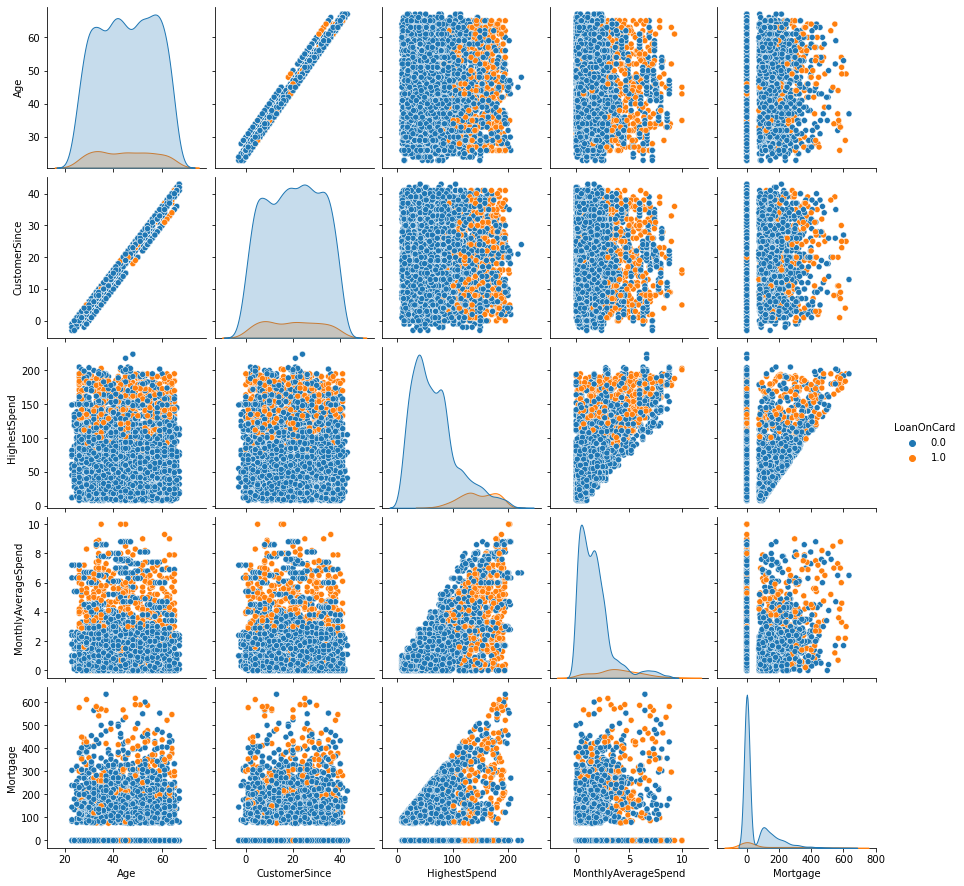

In [45]:
# Lets drop Zipcode and other categorical columns to draw pairplot

df_noncat = df.copy()

df_noncat.drop (['HiddenScore', 'Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'ZipCode'], axis = 1, inplace=True)
sns.pairplot(data= df_noncat, hue= 'LoanOnCard');

From above graph we can say that:

1. CustomerSince and Age is linearly corelated
2. Between Mortgage and HighestSpend there is corelation of upper limit. So they are not exactly linearly corelated but there is some corelation. Same for HighestSpend and MonthlyAverageSpend.
3. LoanOnCard is there for more the Mortgage, CustomerSince, HighestSpend.

For loan we can check customers with Mortgage, who are associated with the bank since long time and HighestSpend.

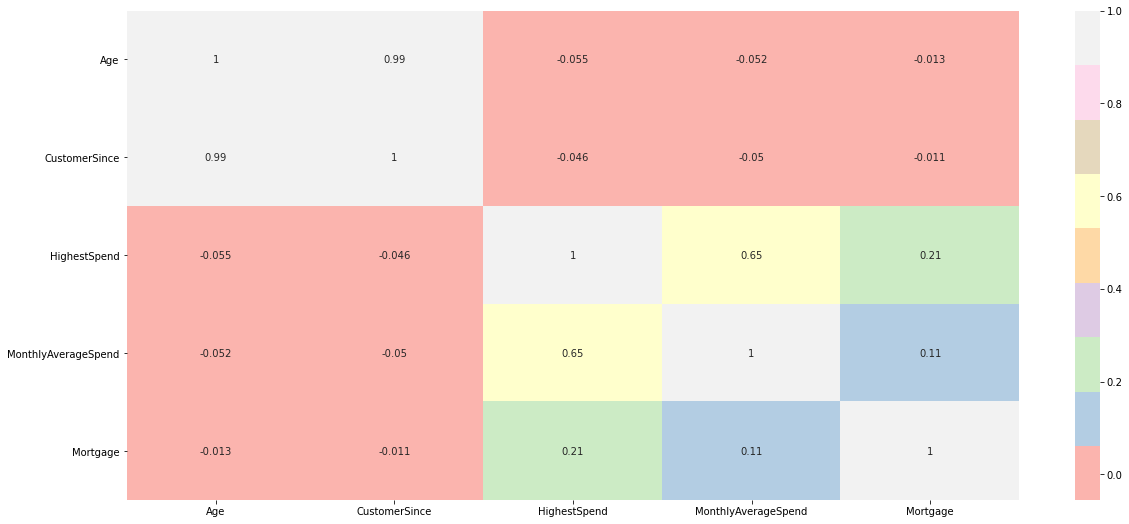

In [46]:
plt.figure(figsize = (20, 9))
sns.heatmap(df_noncat.corr(), annot = True, cmap= 'Pastel1');

From above map we can confirm that there is a linear relation between CustomerSince and Age.

There is some corelation between MonthlyAverageSpend and HighestSpend.

Other data is quiet independent from each other.

#### Multivariate Analysis

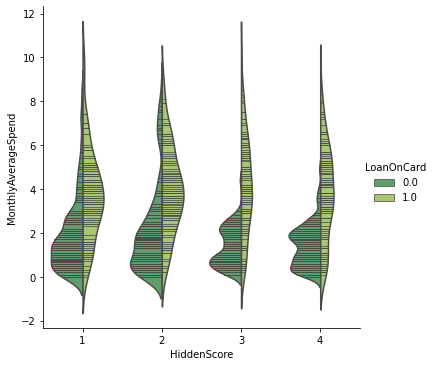

In [47]:
sns.catplot(y='MonthlyAverageSpend', x='HiddenScore', hue='LoanOnCard', kind='violin', inner='stick', split=True,
            palette='summer', data=df);

More the MonthlyAverageSpend more chances of LoanOnCard.

More the score and MonthlyAverageSpend more the LoanOnCard.

We can approach customers with more MonthlyAverageSpend.

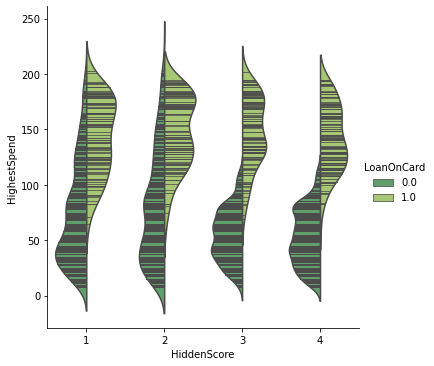

In [48]:
sns.catplot(y='HighestSpend', x='HiddenScore', hue='LoanOnCard', kind='violin', inner='stick', split=True, 
            palette='summer', data=df);

More the HighestSpend more chances of LoanOnCard.

More the score and HighestSpend more the LoanOnCard.

We can approach customers with more HighestSpend.

## 4. Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

In [49]:
# Split target and predictors

y1 = df.pop('LoanOnCard')
X1 = df

In [50]:
# Check target variable distribution

y1.value_counts().to_frame()

,LoanOnCard
0.0,4500
1.0,480


From above table we can say the target data is imbalanced.

To balance the data set we will use SMOTE to upsample our data.

In [51]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  4980 non-null   int64   
 1   CustomerSince        4980 non-null   int64   
 2   HighestSpend         4980 non-null   int64   
 3   ZipCode              4980 non-null   int64   
 4   HiddenScore          4980 non-null   category
 5   MonthlyAverageSpend  4980 non-null   float64 
 6   Level                4980 non-null   category
 7   Mortgage             4980 non-null   int64   
 8   Security             4980 non-null   category
 9   FixedDepositAccount  4980 non-null   category
 10  InternetBanking      4980 non-null   category
 11  CreditCard           4980 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 462.2 KB


In [52]:
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

# Splitting of the data
X1_train, X1_test, y1_train, y1_test = train_test_split (X1, y1, test_size = 0.3, random_state = 50)

print(f'Before SMOTE, count of label 1 :{sum(y1_train == 1)}')
print(f'Before SMOTE, count of label 0 :{sum(y1_train == 0)}\n')

sm = SMOTENC (categorical_features= [4,6,8,9,10,11], k_neighbors= 5, random_state= 15)

# Using SMOTE on train data
X1_trainR, y1_trainR = sm.fit_sample(X1_train, y1_train)

print(f'After SMOTE, count of label 1 :{sum(y1_trainR == 1)}')
print(f'After SMOTE, count of label 0 :{sum(y1_trainR == 0)}')


Before SMOTE, count of label 1 :316
Before SMOTE, count of label 0 :3170

After SMOTE, count of label 1 :3170
After SMOTE, count of label 0 :3170


We have balanced Target variable using SMOTE and we can see the count of 1 and 0 are equal

## 5. Model training, testing and tuning:

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model. 

#### LOGISTIC REGRESSION

In [53]:
# Use logistic regression and build the model on data with SMOTE

model = LogisticRegression()
model.fit(X1_trainR, y1_trainR)

y1_predict = model.predict(X1_test)

# Accuracy of the model

model_score = model.score (X1_test, y1_test)
print(round(model_score, 2))

0.85


85 % of times the prediction was correct and 15 % of times prediction was incorrect.

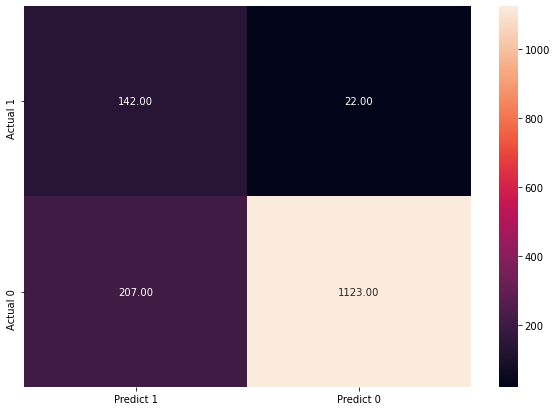

In [54]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y1_test, y1_predict, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

As we want to increase conversion ratio of customers taking loan, we would want less count for Actual loan taking customer but predicted as no customer for loan. In above chart it is 22 (False Negative).

So it is less than the other error of Actual no loan customer but predicting as a customer.

And we want a good recall value.

In [55]:
print (metrics.classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      1330
         1.0       0.41      0.87      0.55       164

    accuracy                           0.85      1494
   macro avg       0.69      0.86      0.73      1494
weighted avg       0.92      0.85      0.87      1494



Recall value is good and accuracy is also good.

Precision and f1 score for 1.0 is very less. But it is ok as good as recall is good.

In [56]:
# For data without SMOTE i.e. Target balancing

model = LogisticRegression(solver ='liblinear')
model.fit(X1_train, y1_train)

y1_predict = model.predict(X1_test)
model_score = model.score (X1_test, y1_test)
print(round(model_score, 2))

print (metrics.classification_report(y1_test, y1_predict))

0.9
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      1330
         1.0       0.61      0.29      0.39       164

    accuracy                           0.90      1494
   macro avg       0.76      0.63      0.67      1494
weighted avg       0.88      0.90      0.89      1494



In this the accuracy (90%) is more than data with SMOTE (85%). But all the scores for 1.0 is less.

Recall value is very less which we do not want.

So we will use data with SMOTE.

#### NAIVE BAYES CLASSIFIERS

In [57]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()

model_NB.fit(X1_trainR, y1_trainR)

y1_predict = model_NB.predict(X1_test)

model_score = model_NB.score(X1_test, y1_test)
print(round(model_score, 2))

0.88


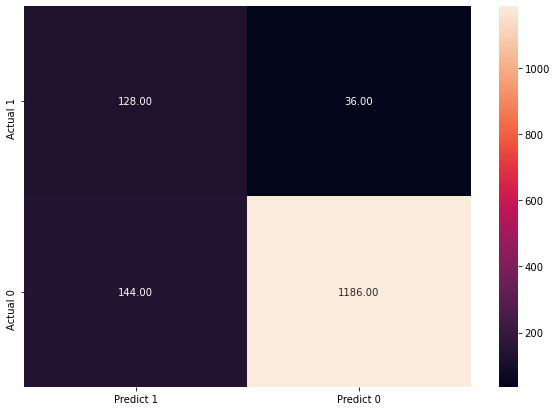

In [58]:
from sklearn.metrics import confusion_matrix
cm = metrics.confusion_matrix (y1_test, y1_predict, labels = [1, 0])
df_cm = pd.DataFrame (cm, index = ['Actual 1', 'Actual 0'], columns = ['Predict 1', 'Predict 0'])
plt.figure(figsize= (10,7))
sns.heatmap(df_cm, annot=True, fmt='.2f');

As we want to increase conversion ratio of customers taking loan, we would want less count for Actual loan taking customer but predicted as no customer for loan. In above chart it is 36 (False Negative).

So it is less than the other error of Actual no loan customer but predicting as a customer.

And we want a good recall value.

In [59]:
print (metrics.classification_report(y1_test, y1_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      1330
         1.0       0.47      0.78      0.59       164

    accuracy                           0.88      1494
   macro avg       0.72      0.84      0.76      1494
weighted avg       0.92      0.88      0.89      1494



The accuracy for this model (88%) is better than Logistic Regression (85%).

But the recall score (78%) is less than Logistic regression (87%).

We need accuracy as well as recall score good. So we will select Logistic regression than Naive Bayes.

In [60]:
# Data without Target Balancing

from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X1_train, y1_train)
y1_predict = model_NB.predict(X1_test)
model_score = model_NB.score(X1_test, y1_test)
print(round(model_score, 2))
print (metrics.classification_report(y1_test, y1_predict))

0.87
              precision    recall  f1-score   support

         0.0       0.94      0.91      0.93      1330
         1.0       0.44      0.56      0.49       164

    accuracy                           0.87      1494
   macro avg       0.69      0.74      0.71      1494
weighted avg       0.89      0.87      0.88      1494



Accuracy score is almost same compared to target balancing data.

But scores for 1.0 are lesser as data for 1.0 is less. 

Even the recall score is less. So we will use data with SMOTE.

## 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.

**Answer**

We have checked data with Logistic Regression and Naive Bayes. Both are giving good accuracy scores but Recall score is also imporatant for us. So, we will go with the Logistic Regression Model.

We can find customers who we predict as loanoncard and focus on them so that the rate of conversion will be more.

We have used SMOTE to balance target data which has not affected much on accuracy score but has improved other scores of 1.0 i.e. precision, recall, f1. We had less test data for 1.0. That might be the reason for less scores.

More data can give more accuracy. More balanced data would have given better results. 

In future if can provide more data would be better.